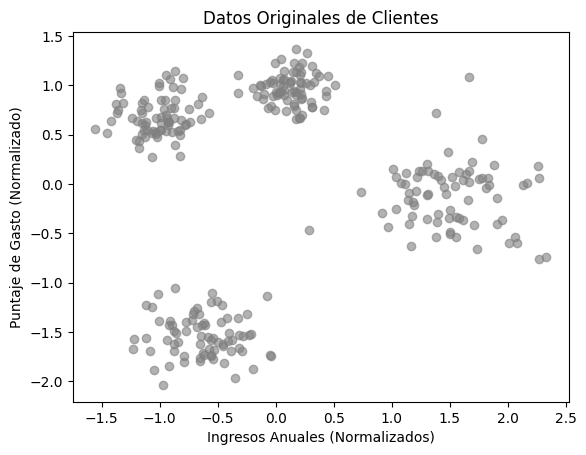

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Generamos datos sintéticos para la segmentación de clientes
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=[1.0, 2.0, 1.5, 1.2], random_state=42)
X = StandardScaler().fit_transform(X) # Normalizamos los datos
# Convertimos los datos en un DataFrame para mayor claridad df = pd.DataFrame(X, columns=["Ingresos Anuales", "Puntaje de Gasto"])
# Visualizamos los datos sin etiquetar
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6)
plt.xlabel("Ingresos Anuales (Normalizados)")
plt.ylabel("Puntaje de Gasto (Normalizado)")
plt.title("Datos Originales de Clientes")
plt.show()

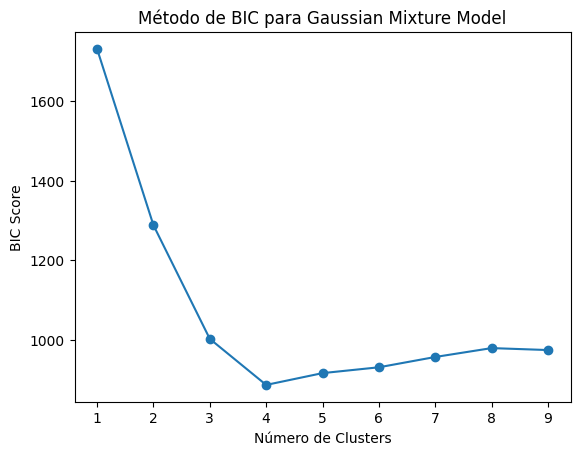

In [3]:
n_components = range(1, 10)
bic_scores = [] # Initialize the bic_scores list
for n in n_components:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# Gráfica de BIC para determinar el número óptimo de clusters
plt.plot(n_components, bic_scores, marker='o', linestyle='-')
plt.xlabel("Número de Clusters")
plt.ylabel("BIC Score")
plt.title("Método de BIC para Gaussian Mixture Model")
plt.show()

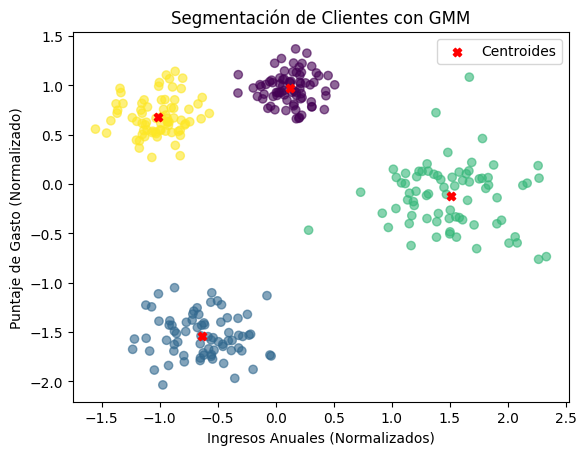

In [4]:
# Aplicamos GMM con el número óptimo de clusters (suponiendo k=4 según BIC)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
# Visualizamos los clusters resultantes
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', label='Centroides')
plt.xlabel("Ingresos Anuales (Normalizados)")
plt.ylabel("Puntaje de Gasto (Normalizado)")
plt.title("Segmentación de Clientes con GMM")
plt.legend()
plt.show()